Chapter 7 of [a guided tour of mathematical methods for the physical sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#KUoGXYx5FTwytcUg.97) introduces the curl of a vector field. As with the previosuu topic of divergence, perhaps the most intuitive example is fluid flow. This flow represents a vector field, in which you could insert imaginary paddle wheels to describe the presence of "curl" or rotation in the field. These paddle wheels would capture well the physical interpretation of the curl operator, as established in our book:

"The component of the curl of a vector field ${\bf v}$ in a certain direction is the closed line integral of ${\bf v}$ along a closed path perpendicular to this direction, per unit surface area." Captured in mathematics, this is 

$$ \frac{\oint {\bf v} \cdot d{\bf S}}{d{\bf S}}$$

Let us set up a grid for fluid flow, where the curl of this particular vector field is also called [*vorticity*](https://en.wikipedia.org/wiki/Vorticity):

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# set up a normalized grid:
dim= 10
xarray= np.arange(-dim,dim)
yarray= np.arange(-dim,dim)

x,y = np.meshgrid(xarray,yarray)

### Rigid rotation 
In our book, we derived how fluid flow with a rigid rotation requires that the veloity increases with radius, and:

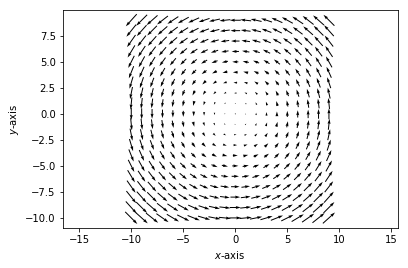

In [4]:
vx = -y
vy = x

# plot the flow lines:
plt.figure()
plt.quiver(x,y, vx, vy, pivot='mid')
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

We now numerically approximate the vertical component of the curl of this vector field by computing the line integral as the sum of a small square in our grid:

In [6]:
xmin=3
xmax=4
ymin=3
ymax=4

The closed line integral is reduced to a sum:

In [7]:
bottom = -np.sum(vy[ymin,xmin:xmax])
right = np.sum(vx[ymin:ymax,xmax])
top = np.sum(vy[ymax,xmax:xmin:-1])
left = -np.sum(vx[ymax:ymin:-1,xmin])
area = (xmax-xmin)*(ymax-ymin)
total = (top+bottom+left+right)/area

Let's plot the flow and box, with the vertical component of the curl in its title: 

<IPython.core.display.Javascript object>


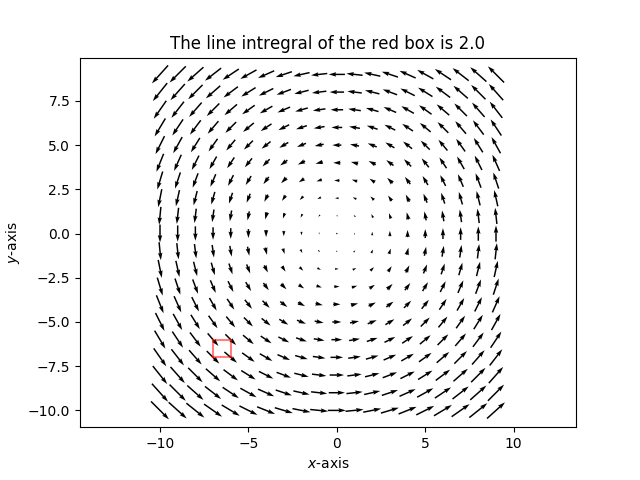

In [8]:
plt.figure()
plt.title('The line intregral of the red box is {:.3}'.format(total))
plt.quiver(x,y, vx, vy, pivot='mid')

# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5) # bottom
plt.plot(x[ymax,xmax:xmin-1:-1],y[ymax,xmax:xmin-1:-1],'r',alpha=0.5) # top
plt.plot(x[ymax:ymin-1:-1,xmin],y[ymax:ymin-1:-1,xmin],'r',alpha=0.5) # left
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5) # right
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

Varying the location of the box, you will find that what we derived in the book: the vorticity equals 2 everywhere! 1 for the rotation of the paddle wheel around the source, and 1 more for the shear introduced by the fluid flow that increases as a function of the radius.

### A model for hurricane winds or the Biot Savart Law
Let's now define a different fluid flow pattern where a rotational field decreases in amplitude radially away from the source. This model is equivalent to winds in a hurricane, or the magnetic field around a long vertical wire:

In [9]:
r= np.sqrt(x**2+y**2)
vx = -y/r**2
vy = x/r**2

/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


Apologies for the "pesky" warning, but can you figure out what invalid value python is complaining about? Where do you think these values are occurring? Maybe if we *plot* the fluid flow, things become more clear:

<IPython.core.display.Javascript object>


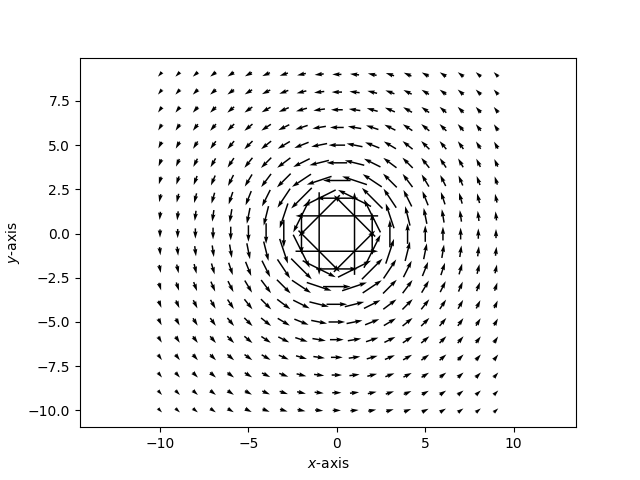

In [10]:
plt.figure()
plt.quiver(x,y, vx, vy, pivot='mid')
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

Near the origin, the values of the flow get really big, so let us mask the singularity at the source:

In [11]:
threshold = 0.33
Mx = np.abs(vx) > threshold
My = np.abs(vy) > threshold
vx = np.ma.masked_array(vx, mask=Mx)
vy = np.ma.masked_array(vy, mask=My)

/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/kvan637/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


Let's define a box in this 2D flow, and compute the z-component of the vorticity:

In [ ]:
xmin=3
xmax=4
ymin=3
ymax=4

# closed line "integral".
bottom = -np.sum(vy[ymin,xmin:xmax])
right = np.sum(vx[ymin:ymax,xmax])
top = np.sum(vy[ymax,xmax:xmin:-1])
left = -np.sum(vx[ymax:ymin:-1,xmin])

area = (xmax-xmin)*(ymax-ymin)

total = (top+bottom+left+right)/area

plot the flow, the box, and the vorticity (in the title):

<IPython.core.display.Javascript object>


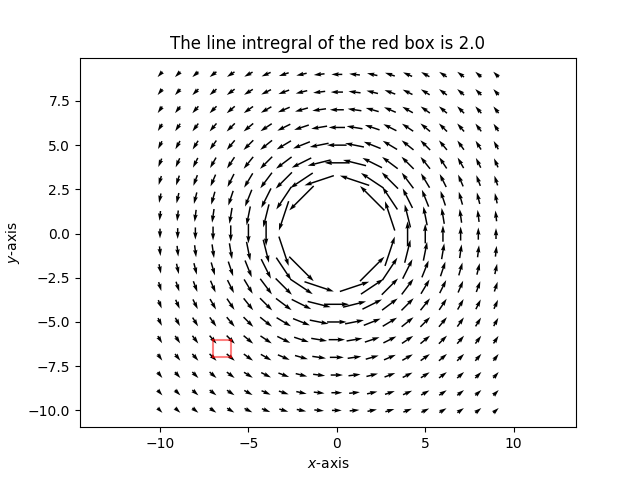

In [12]:
plt.figure()
plt.title('The line intregral of the red box is {:.3}'.format(total))
plt.quiver(x,y, vx, vy, pivot='mid')

# bottom, top, left and right side of the box, respectively:
plt.plot(x[ymin,xmin:xmax+1],y[ymin,xmin:xmax+1],'r',alpha=0.5) # bottom
plt.plot(x[ymax,xmax:xmin-1:-1],y[ymax,xmax:xmin-1:-1],'r',alpha=0.5) # top
plt.plot(x[ymax:ymin-1:-1,xmin],y[ymax:ymin-1:-1,xmin],'r',alpha=0.5) # left
plt.plot(x[ymin:ymax+1,xmax],y[ymin:ymax+1,xmax],'r',alpha=0.5) # right
plt.xlabel("$x$-axis")
plt.ylabel("$y$-axis")
plt.axis('equal')
plt.show()

Despite the radial motion in the fluid flow, the decay of this motion away from the origin leads to a shear that counteracts the pure rotational movement. In other words, a paddle wheel at the location of the red box -- or anywhere else in the grid for that matter -- would not spin around its axis (and rigidly move with the flow). 

Move the box around the grid, and you will find that the the vorticity is zero everywhere in the grid! In Chapter 7 of our book we showed this can be easily verified analytically. The chapter concludes by deriving the curl of a vector field in cylindrical and spherical coordinate systems. With the knowledge of the curl, grad and div operators, we are ready for the physics that involves these. Let's get back to the [overview of jupyter notebooks](https://pal.blogs.auckland.ac.nz/2017/12/02/jupyter-notebooks-for-mathematical-methods-in-the-physical-sciences/)!